In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import random

In [3]:
plt.style.use("ggplot") 

In [4]:
def gen_spin(size=400, n=2, n_class=2, noise=2):
    xs = np.zeros((size * n, 2), dtype=np.float32)
    ys = np.zeros(size * n, dtype=np.int32)
    for i in range(n):
        ix = range(size * i, size * (i + 1))
        r = np.linspace(0.0, 5, size + 1)[1:]
        t = np.linspace(2 * i * np.pi / n, (2 * (i + 4) + 1) * np.pi / n, size)
        xs[ix] = np.c_[r * np.sin(t) + random.uniform(-1, 1) * noise, r * np.cos(t) + random.uniform(-1, 1) * noise]
        ys[ix] = i % n_class
    z = []
    for yy in ys:
        tmp = [0 if i != yy else 1 for i in range(n_class)]
        z.append(tmp)
    return xs, np.array(z)

def gen_feature(x):
    x1 = x[:, 0]
    x2 = x[:, 1]
    x_square = np.square(x)
    x1x2 = x1 * x2
    sin_x = np.sin(x)
    return np.c_[x, x_square, x1x2, sin_x]

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, pred, xx, yy, **params):
    Z = pred.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# Data

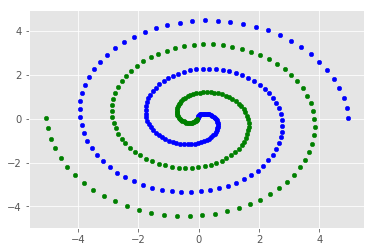

In [5]:
data_size = 150
x, label = gen_spin(size=data_size, noise=0.1)
feature = gen_feature(x)

class_0 = x[label[:, 0] == 1]
class_1 = x[label[:, 1] == 1]
plt.scatter(class_0[:, 0], class_0[:, 1], c='b', s=20)
plt.scatter(class_1[:, 0], class_1[:, 1], c='g', s=20)

In [6]:
np.concatenate([x, label], axis=1)

array([[-0.03690465,  0.04664385,  1.        ,  0.        ],
       [-0.03058878,  0.07967734,  1.        ,  0.        ],
       [-0.01804226,  0.11151546,  1.        ,  0.        ],
       ..., 
       [-4.90768576, -0.90643573,  0.        ,  1.        ],
       [-5.00723648, -0.44642371,  0.        ,  1.        ],
       [-5.06290865,  0.02410848,  0.        ,  1.        ]])

# Start Tensorflow Part

In [7]:
import tensorflow as tf

In [8]:
idx = np.random.choice(data_size * 2, data_size * 2, replace=False)

In [9]:
train_feature = feature[idx]
train_label = label[idx]

In [10]:
# construct network
alpha = 0.003
batch_size = 10
max_iter = 8000

In [11]:
X = tf.placeholder(tf.float32, shape=(None, 7))
y = tf.placeholder(tf.float32, shape=(None, 2))

with tf.variable_scope("Net"):
    dense1 = tf.layers.dense(X, units=10, activation=tf.nn.tanh)
    dense2 = tf.layers.dense(dense1, units=9, activation=tf.nn.tanh)
    dense3 = tf.layers.dense(dense2, units=5, activation=tf.nn.tanh)
    out = tf.layers.dense(dense3, units=2, activation=tf.nn.tanh)

In [12]:
train_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=out))
train_op = tf.train.AdamOptimizer(alpha).minimize(train_loss)

In [13]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [14]:
loss_list = []
for i in range(max_iter):
    idx = np.random.choice(data_size, batch_size)
    loss, _ = sess.run([train_loss, train_op], feed_dict={X: train_feature, y: train_label})
    loss_list.append(loss)
    print "\rIteration: {}/{}, Loss: {}.".format(i, max_iter, loss)
    sys.stdout.flush()

Iteration: 0/8000, Loss: 0.705349206924.
Iteration: 1/8000, Loss: 0.701860845089.
Iteration: 2/8000, Loss: 0.698654949665.
Iteration: 3/8000, Loss: 0.695667386055.
Iteration: 4/8000, Loss: 0.692884802818.
Iteration: 5/8000, Loss: 0.690314114094.
Iteration: 6/8000, Loss: 0.687959492207.
Iteration: 7/8000, Loss: 0.685818076134.
Iteration: 8/8000, Loss: 0.683876037598.
Iteration: 9/8000, Loss: 0.682106494904.
Iteration: 10/8000, Loss: 0.680473566055.
Iteration: 11/8000, Loss: 0.678939282894.
Iteration: 12/8000, Loss: 0.677469193935.
Iteration: 13/8000, Loss: 0.676034510136.
Iteration: 14/8000, Loss: 0.67461335659.
Iteration: 15/8000, Loss: 0.673190951347.
Iteration: 16/8000, Loss: 0.671758592129.
Iteration: 17/8000, Loss: 0.670312941074.
Iteration: 18/8000, Loss: 0.668854057789.
Iteration: 19/8000, Loss: 0.667383909225.
Iteration: 20/8000, Loss: 0.66590410471.
Iteration: 21/8000, Loss: 0.664415001869.
Iteration: 22/8000, Loss: 0.662914574146.
Iteration: 23/8000, Loss: 0.66139960289.
Itera

Iteration: 194/8000, Loss: 0.314587205648.
Iteration: 195/8000, Loss: 0.312675118446.
Iteration: 196/8000, Loss: 0.3109562397.
Iteration: 197/8000, Loss: 0.3089633286.
Iteration: 198/8000, Loss: 0.306857407093.
Iteration: 199/8000, Loss: 0.305147349834.
Iteration: 200/8000, Loss: 0.303198933601.
Iteration: 201/8000, Loss: 0.30124181509.
Iteration: 202/8000, Loss: 0.299536049366.
Iteration: 203/8000, Loss: 0.297545999289.
Iteration: 204/8000, Loss: 0.295747935772.
Iteration: 205/8000, Loss: 0.293989479542.
Iteration: 206/8000, Loss: 0.292064845562.
Iteration: 207/8000, Loss: 0.29038053751.
Iteration: 208/8000, Loss: 0.288544774055.
Iteration: 209/8000, Loss: 0.286758959293.
Iteration: 210/8000, Loss: 0.285058140755.
Iteration: 211/8000, Loss: 0.283224076033.
Iteration: 212/8000, Loss: 0.281525611877.
Iteration: 213/8000, Loss: 0.279828071594.
Iteration: 214/8000, Loss: 0.27805569768.
Iteration: 215/8000, Loss: 0.276367038488.
Iteration: 216/8000, Loss: 0.274722099304.
Iteration: 217/800

Iteration: 386/8000, Loss: 0.132128089666.
Iteration: 387/8000, Loss: 0.132067322731.
Iteration: 388/8000, Loss: 0.132008045912.
Iteration: 389/8000, Loss: 0.131950303912.
Iteration: 390/8000, Loss: 0.131893962622.
Iteration: 391/8000, Loss: 0.131838932633.
Iteration: 392/8000, Loss: 0.131785273552.
Iteration: 393/8000, Loss: 0.131732836366.
Iteration: 394/8000, Loss: 0.131681576371.
Iteration: 395/8000, Loss: 0.13163150847.
Iteration: 396/8000, Loss: 0.131582543254.
Iteration: 397/8000, Loss: 0.131534606218.
Iteration: 398/8000, Loss: 0.131487712264.
Iteration: 399/8000, Loss: 0.131441831589.
Iteration: 400/8000, Loss: 0.131396874785.
Iteration: 401/8000, Loss: 0.131352841854.
Iteration: 402/8000, Loss: 0.131309702992.
Iteration: 403/8000, Loss: 0.131267428398.
Iteration: 404/8000, Loss: 0.131225958467.
Iteration: 405/8000, Loss: 0.131185278296.
Iteration: 406/8000, Loss: 0.131145387888.
Iteration: 407/8000, Loss: 0.131106242537.
Iteration: 408/8000, Loss: 0.131067812443.
Iteration: 4

Iteration: 577/8000, Loss: 0.128443658352.
Iteration: 578/8000, Loss: 0.128437265754.
Iteration: 579/8000, Loss: 0.12843093276.
Iteration: 580/8000, Loss: 0.128424629569.
Iteration: 581/8000, Loss: 0.128418371081.
Iteration: 582/8000, Loss: 0.128412157297.
Iteration: 583/8000, Loss: 0.128405988216.
Iteration: 584/8000, Loss: 0.128399848938.
Iteration: 585/8000, Loss: 0.128393769264.
Iteration: 586/8000, Loss: 0.128387719393.
Iteration: 587/8000, Loss: 0.128381699324.
Iteration: 588/8000, Loss: 0.128375738859.
Iteration: 589/8000, Loss: 0.128369837999.
Iteration: 590/8000, Loss: 0.12836393714.
Iteration: 591/8000, Loss: 0.128358095884.
Iteration: 592/8000, Loss: 0.128352284431.
Iteration: 593/8000, Loss: 0.128346532583.
Iteration: 594/8000, Loss: 0.128340780735.
Iteration: 595/8000, Loss: 0.128335088491.
Iteration: 596/8000, Loss: 0.128329440951.
Iteration: 597/8000, Loss: 0.128323823214.
Iteration: 598/8000, Loss: 0.128318235278.
Iteration: 599/8000, Loss: 0.128312692046.
Iteration: 60

Iteration: 768/8000, Loss: 0.127714335918.
Iteration: 769/8000, Loss: 0.127712115645.
Iteration: 770/8000, Loss: 0.12770986557.
Iteration: 771/8000, Loss: 0.127707630396.
Iteration: 772/8000, Loss: 0.127705425024.
Iteration: 773/8000, Loss: 0.127703219652.
Iteration: 774/8000, Loss: 0.127701029181.
Iteration: 775/8000, Loss: 0.127698838711.
Iteration: 776/8000, Loss: 0.127696663141.
Iteration: 777/8000, Loss: 0.127694487572.
Iteration: 778/8000, Loss: 0.127692326903.
Iteration: 779/8000, Loss: 0.127690181136.
Iteration: 780/8000, Loss: 0.127688035369.
Iteration: 781/8000, Loss: 0.127685904503.
Iteration: 782/8000, Loss: 0.127683773637.
Iteration: 783/8000, Loss: 0.127681672573.
Iteration: 784/8000, Loss: 0.127679571509.
Iteration: 785/8000, Loss: 0.127677485347.
Iteration: 786/8000, Loss: 0.127675384283.
Iteration: 787/8000, Loss: 0.12767329812.
Iteration: 788/8000, Loss: 0.12767124176.
Iteration: 789/8000, Loss: 0.1276691854.
Iteration: 790/8000, Loss: 0.12766712904.
Iteration: 791/80

Iteration: 960/8000, Loss: 0.127412006259.
Iteration: 961/8000, Loss: 0.127410918474.
Iteration: 962/8000, Loss: 0.127409830689.
Iteration: 963/8000, Loss: 0.127408757806.
Iteration: 964/8000, Loss: 0.127407670021.
Iteration: 965/8000, Loss: 0.127406597137.
Iteration: 966/8000, Loss: 0.127405524254.
Iteration: 967/8000, Loss: 0.12740445137.
Iteration: 968/8000, Loss: 0.127403393388.
Iteration: 969/8000, Loss: 0.127402320504.
Iteration: 970/8000, Loss: 0.127401262522.
Iteration: 971/8000, Loss: 0.12740021944.
Iteration: 972/8000, Loss: 0.127399176359.
Iteration: 973/8000, Loss: 0.127398133278.
Iteration: 974/8000, Loss: 0.127397075295.
Iteration: 975/8000, Loss: 0.127396047115.
Iteration: 976/8000, Loss: 0.127395004034.
Iteration: 977/8000, Loss: 0.127393960953.
Iteration: 978/8000, Loss: 0.127392932773.
Iteration: 979/8000, Loss: 0.127391904593.
Iteration: 980/8000, Loss: 0.127390891314.
Iteration: 981/8000, Loss: 0.127389863133.
Iteration: 982/8000, Loss: 0.127388849854.
Iteration: 98

Iteration: 1148/8000, Loss: 0.1272572577.
Iteration: 1149/8000, Loss: 0.127256646752.
Iteration: 1150/8000, Loss: 0.127256035805.
Iteration: 1151/8000, Loss: 0.127255439758.
Iteration: 1152/8000, Loss: 0.127254828811.
Iteration: 1153/8000, Loss: 0.127254217863.
Iteration: 1154/8000, Loss: 0.127253606915.
Iteration: 1155/8000, Loss: 0.127253010869.
Iteration: 1156/8000, Loss: 0.127252399921.
Iteration: 1157/8000, Loss: 0.127251803875.
Iteration: 1158/8000, Loss: 0.127251207829.
Iteration: 1159/8000, Loss: 0.127250611782.
Iteration: 1160/8000, Loss: 0.127250015736.
Iteration: 1161/8000, Loss: 0.12724943459.
Iteration: 1162/8000, Loss: 0.127248838544.
Iteration: 1163/8000, Loss: 0.127248242497.
Iteration: 1164/8000, Loss: 0.127247646451.
Iteration: 1165/8000, Loss: 0.127247065306.
Iteration: 1166/8000, Loss: 0.12724648416.
Iteration: 1167/8000, Loss: 0.127245903015.
Iteration: 1168/8000, Loss: 0.127245306969.
Iteration: 1169/8000, Loss: 0.127244740725.
Iteration: 1170/8000, Loss: 0.127244

Iteration: 1335/8000, Loss: 0.127166718245.
Iteration: 1336/8000, Loss: 0.127166330814.
Iteration: 1337/8000, Loss: 0.127165958285.
Iteration: 1338/8000, Loss: 0.127165585756.
Iteration: 1339/8000, Loss: 0.127165213227.
Iteration: 1340/8000, Loss: 0.127164840698.
Iteration: 1341/8000, Loss: 0.127164468169.
Iteration: 1342/8000, Loss: 0.127164080739.
Iteration: 1343/8000, Loss: 0.12716370821.
Iteration: 1344/8000, Loss: 0.127163350582.
Iteration: 1345/8000, Loss: 0.127162963152.
Iteration: 1346/8000, Loss: 0.127162605524.
Iteration: 1347/8000, Loss: 0.127162218094.
Iteration: 1348/8000, Loss: 0.127161860466.
Iteration: 1349/8000, Loss: 0.127161487937.
Iteration: 1350/8000, Loss: 0.127161130309.
Iteration: 1351/8000, Loss: 0.12716075778.
Iteration: 1352/8000, Loss: 0.12716037035.
Iteration: 1353/8000, Loss: 0.127160027623.
Iteration: 1354/8000, Loss: 0.127159655094.
Iteration: 1355/8000, Loss: 0.127159282565.
Iteration: 1356/8000, Loss: 0.127158939838.
Iteration: 1357/8000, Loss: 0.12715

Iteration: 1522/8000, Loss: 0.127108618617.
Iteration: 1523/8000, Loss: 0.127108365297.
Iteration: 1524/8000, Loss: 0.127108111978.
Iteration: 1525/8000, Loss: 0.127107858658.
Iteration: 1526/8000, Loss: 0.127107605338.
Iteration: 1527/8000, Loss: 0.12710736692.
Iteration: 1528/8000, Loss: 0.1271071136.
Iteration: 1529/8000, Loss: 0.12710686028.
Iteration: 1530/8000, Loss: 0.12710660696.
Iteration: 1531/8000, Loss: 0.127106368542.
Iteration: 1532/8000, Loss: 0.127106115222.
Iteration: 1533/8000, Loss: 0.127105861902.
Iteration: 1534/8000, Loss: 0.127105623484.
Iteration: 1535/8000, Loss: 0.127105355263.
Iteration: 1536/8000, Loss: 0.127105116844.
Iteration: 1537/8000, Loss: 0.127104878426.
Iteration: 1538/8000, Loss: 0.127104625106.
Iteration: 1539/8000, Loss: 0.127104386687.
Iteration: 1540/8000, Loss: 0.127104133368.
Iteration: 1541/8000, Loss: 0.127103894949.
Iteration: 1542/8000, Loss: 0.12710365653.
Iteration: 1543/8000, Loss: 0.127103418112.
Iteration: 1544/8000, Loss: 0.12710316

Iteration: 1709/8000, Loss: 0.127068862319.
Iteration: 1710/8000, Loss: 0.127068683505.
Iteration: 1711/8000, Loss: 0.127068504691.
Iteration: 1712/8000, Loss: 0.127068325877.
Iteration: 1713/8000, Loss: 0.127068147063.
Iteration: 1714/8000, Loss: 0.12706798315.
Iteration: 1715/8000, Loss: 0.127067789435.
Iteration: 1716/8000, Loss: 0.127067625523.
Iteration: 1717/8000, Loss: 0.127067446709.
Iteration: 1718/8000, Loss: 0.127067282796.
Iteration: 1719/8000, Loss: 0.127067103982.
Iteration: 1720/8000, Loss: 0.127066910267.
Iteration: 1721/8000, Loss: 0.127066746354.
Iteration: 1722/8000, Loss: 0.127066582441.
Iteration: 1723/8000, Loss: 0.127066403627.
Iteration: 1724/8000, Loss: 0.127066224813.
Iteration: 1725/8000, Loss: 0.127066046.
Iteration: 1726/8000, Loss: 0.127065882087.
Iteration: 1727/8000, Loss: 0.127065703273.
Iteration: 1728/8000, Loss: 0.12706553936.
Iteration: 1729/8000, Loss: 0.127065375447.
Iteration: 1730/8000, Loss: 0.127065196633.
Iteration: 1731/8000, Loss: 0.1270650

Iteration: 1896/8000, Loss: 0.127040371299.
Iteration: 1897/8000, Loss: 0.127040237188.
Iteration: 1898/8000, Loss: 0.127040117979.
Iteration: 1899/8000, Loss: 0.127039983869.
Iteration: 1900/8000, Loss: 0.127039864659.
Iteration: 1901/8000, Loss: 0.127039730549.
Iteration: 1902/8000, Loss: 0.12703961134.
Iteration: 1903/8000, Loss: 0.127039462328.
Iteration: 1904/8000, Loss: 0.127039343119.
Iteration: 1905/8000, Loss: 0.127039223909.
Iteration: 1906/8000, Loss: 0.127039089799.
Iteration: 1907/8000, Loss: 0.127038955688.
Iteration: 1908/8000, Loss: 0.127038836479.
Iteration: 1909/8000, Loss: 0.127038702369.
Iteration: 1910/8000, Loss: 0.127038583159.
Iteration: 1911/8000, Loss: 0.127038449049.
Iteration: 1912/8000, Loss: 0.127038314939.
Iteration: 1913/8000, Loss: 0.127038195729.
Iteration: 1914/8000, Loss: 0.127038046718.
Iteration: 1915/8000, Loss: 0.12703794241.
Iteration: 1916/8000, Loss: 0.127037808299.
Iteration: 1917/8000, Loss: 0.127037703991.
Iteration: 1918/8000, Loss: 0.1270

Iteration: 2082/8000, Loss: 0.127019330859.
Iteration: 2083/8000, Loss: 0.127019241452.
Iteration: 2084/8000, Loss: 0.127019137144.
Iteration: 2085/8000, Loss: 0.127019032836.
Iteration: 2086/8000, Loss: 0.127018943429.
Iteration: 2087/8000, Loss: 0.127018839121.
Iteration: 2088/8000, Loss: 0.127018749714.
Iteration: 2089/8000, Loss: 0.127018660307.
Iteration: 2090/8000, Loss: 0.127018555999.
Iteration: 2091/8000, Loss: 0.127018451691.
Iteration: 2092/8000, Loss: 0.127018362284.
Iteration: 2093/8000, Loss: 0.127018257976.
Iteration: 2094/8000, Loss: 0.127018168569.
Iteration: 2095/8000, Loss: 0.12701806426.
Iteration: 2096/8000, Loss: 0.127017974854.
Iteration: 2097/8000, Loss: 0.127017885447.
Iteration: 2098/8000, Loss: 0.127017781138.
Iteration: 2099/8000, Loss: 0.12701767683.
Iteration: 2100/8000, Loss: 0.127017587423.
Iteration: 2101/8000, Loss: 0.127017483115.
Iteration: 2102/8000, Loss: 0.127017393708.
Iteration: 2103/8000, Loss: 0.127017304301.
Iteration: 2104/8000, Loss: 0.1270

Iteration: 2269/8000, Loss: 0.127003192902.
Iteration: 2270/8000, Loss: 0.127003133297.
Iteration: 2271/8000, Loss: 0.12700304389.
Iteration: 2272/8000, Loss: 0.127002984285.
Iteration: 2273/8000, Loss: 0.12700290978.
Iteration: 2274/8000, Loss: 0.127002820373.
Iteration: 2275/8000, Loss: 0.127002760768.
Iteration: 2276/8000, Loss: 0.127002671361.
Iteration: 2277/8000, Loss: 0.127002581954.
Iteration: 2278/8000, Loss: 0.127002522349.
Iteration: 2279/8000, Loss: 0.127002447844.
Iteration: 2280/8000, Loss: 0.127002388239.
Iteration: 2281/8000, Loss: 0.127002298832.
Iteration: 2282/8000, Loss: 0.127002224326.
Iteration: 2283/8000, Loss: 0.12700214982.
Iteration: 2284/8000, Loss: 0.127002075315.
Iteration: 2285/8000, Loss: 0.12700201571.
Iteration: 2286/8000, Loss: 0.127001926303.
Iteration: 2287/8000, Loss: 0.127001851797.
Iteration: 2288/8000, Loss: 0.127001777291.
Iteration: 2289/8000, Loss: 0.127001702785.
Iteration: 2290/8000, Loss: 0.127001643181.
Iteration: 2291/8000, Loss: 0.127001

Iteration: 2456/8000, Loss: 0.126990631223.
Iteration: 2457/8000, Loss: 0.126990586519.
Iteration: 2458/8000, Loss: 0.126990526915.
Iteration: 2459/8000, Loss: 0.12699046731.
Iteration: 2460/8000, Loss: 0.126990407705.
Iteration: 2461/8000, Loss: 0.126990348101.
Iteration: 2462/8000, Loss: 0.126990288496.
Iteration: 2463/8000, Loss: 0.12699021399.
Iteration: 2464/8000, Loss: 0.126990169287.
Iteration: 2465/8000, Loss: 0.126990109682.
Iteration: 2466/8000, Loss: 0.126990050077.
Iteration: 2467/8000, Loss: 0.126989990473.
Iteration: 2468/8000, Loss: 0.126989930868.
Iteration: 2469/8000, Loss: 0.126989871264.
Iteration: 2470/8000, Loss: 0.126989811659.
Iteration: 2471/8000, Loss: 0.126989752054.
Iteration: 2472/8000, Loss: 0.12698969245.
Iteration: 2473/8000, Loss: 0.126989632845.
Iteration: 2474/8000, Loss: 0.12698957324.
Iteration: 2475/8000, Loss: 0.126989513636.
Iteration: 2476/8000, Loss: 0.126989468932.
Iteration: 2477/8000, Loss: 0.126989394426.
Iteration: 2478/8000, Loss: 0.126989

Iteration: 2643/8000, Loss: 0.126980677247.
Iteration: 2644/8000, Loss: 0.126980647445.
Iteration: 2645/8000, Loss: 0.126980572939.
Iteration: 2646/8000, Loss: 0.126980558038.
Iteration: 2647/8000, Loss: 0.126980498433.
Iteration: 2648/8000, Loss: 0.12698045373.
Iteration: 2649/8000, Loss: 0.126980409026.
Iteration: 2650/8000, Loss: 0.126980349422.
Iteration: 2651/8000, Loss: 0.126980304718.
Iteration: 2652/8000, Loss: 0.126980245113.
Iteration: 2653/8000, Loss: 0.126980215311.
Iteration: 2654/8000, Loss: 0.126980185509.
Iteration: 2655/8000, Loss: 0.126980111003.
Iteration: 2656/8000, Loss: 0.126980081201.
Iteration: 2657/8000, Loss: 0.126980021596.
Iteration: 2658/8000, Loss: 0.126979976892.
Iteration: 2659/8000, Loss: 0.12697994709.
Iteration: 2660/8000, Loss: 0.126979872584.
Iteration: 2661/8000, Loss: 0.126979827881.
Iteration: 2662/8000, Loss: 0.126979783177.
Iteration: 2663/8000, Loss: 0.126979738474.
Iteration: 2664/8000, Loss: 0.12697969377.
Iteration: 2665/8000, Loss: 0.12697

Iteration: 2830/8000, Loss: 0.126972660422.
Iteration: 2831/8000, Loss: 0.126972615719.
Iteration: 2832/8000, Loss: 0.126972600818.
Iteration: 2833/8000, Loss: 0.126972556114.
Iteration: 2834/8000, Loss: 0.126972511411.
Iteration: 2835/8000, Loss: 0.126972481608.
Iteration: 2836/8000, Loss: 0.126972422004.
Iteration: 2837/8000, Loss: 0.126972392201.
Iteration: 2838/8000, Loss: 0.126972362399.
Iteration: 2839/8000, Loss: 0.126972317696.
Iteration: 2840/8000, Loss: 0.126972287893.
Iteration: 2841/8000, Loss: 0.126972258091.
Iteration: 2842/8000, Loss: 0.126972198486.
Iteration: 2843/8000, Loss: 0.126972168684.
Iteration: 2844/8000, Loss: 0.126972109079.
Iteration: 2845/8000, Loss: 0.126972079277.
Iteration: 2846/8000, Loss: 0.126972064376.
Iteration: 2847/8000, Loss: 0.126972004771.
Iteration: 2848/8000, Loss: 0.126971974969.
Iteration: 2849/8000, Loss: 0.126971930265.
Iteration: 2850/8000, Loss: 0.126971900463.
Iteration: 2851/8000, Loss: 0.126971870661.
Iteration: 2852/8000, Loss: 0.12

Iteration: 3016/8000, Loss: 0.126966148615.
Iteration: 3017/8000, Loss: 0.126966103911.
Iteration: 3018/8000, Loss: 0.12696608901.
Iteration: 3019/8000, Loss: 0.126966044307.
Iteration: 3020/8000, Loss: 0.126966014504.
Iteration: 3021/8000, Loss: 0.126965984702.
Iteration: 3022/8000, Loss: 0.1269659549.
Iteration: 3023/8000, Loss: 0.126965925097.
Iteration: 3024/8000, Loss: 0.126965895295.
Iteration: 3025/8000, Loss: 0.126965865493.
Iteration: 3026/8000, Loss: 0.12696583569.
Iteration: 3027/8000, Loss: 0.126965805888.
Iteration: 3028/8000, Loss: 0.126965776086.
Iteration: 3029/8000, Loss: 0.126965731382.
Iteration: 3030/8000, Loss: 0.126965716481.
Iteration: 3031/8000, Loss: 0.126965671778.
Iteration: 3032/8000, Loss: 0.126965641975.
Iteration: 3033/8000, Loss: 0.126965612173.
Iteration: 3034/8000, Loss: 0.126965582371.
Iteration: 3035/8000, Loss: 0.126965552568.
Iteration: 3036/8000, Loss: 0.126965522766.
Iteration: 3037/8000, Loss: 0.126965492964.
Iteration: 3038/8000, Loss: 0.126965

Iteration: 3203/8000, Loss: 0.126960739493.
Iteration: 3204/8000, Loss: 0.126960709691.
Iteration: 3205/8000, Loss: 0.126960664988.
Iteration: 3206/8000, Loss: 0.126960650086.
Iteration: 3207/8000, Loss: 0.126960635185.
Iteration: 3208/8000, Loss: 0.126960590482.
Iteration: 3209/8000, Loss: 0.126960575581.
Iteration: 3210/8000, Loss: 0.126960545778.
Iteration: 3211/8000, Loss: 0.126960515976.
Iteration: 3212/8000, Loss: 0.126960486174.
Iteration: 3213/8000, Loss: 0.126960486174.
Iteration: 3214/8000, Loss: 0.12696044147.
Iteration: 3215/8000, Loss: 0.126960411668.
Iteration: 3216/8000, Loss: 0.126960396767.
Iteration: 3217/8000, Loss: 0.126960366964.
Iteration: 3218/8000, Loss: 0.126960337162.
Iteration: 3219/8000, Loss: 0.12696030736.
Iteration: 3220/8000, Loss: 0.126960277557.
Iteration: 3221/8000, Loss: 0.126960262656.
Iteration: 3222/8000, Loss: 0.126960247755.
Iteration: 3223/8000, Loss: 0.126960217953.
Iteration: 3224/8000, Loss: 0.12696018815.
Iteration: 3225/8000, Loss: 0.12696

Iteration: 3390/8000, Loss: 0.126956224442.
Iteration: 3391/8000, Loss: 0.126956179738.
Iteration: 3392/8000, Loss: 0.126956164837.
Iteration: 3393/8000, Loss: 0.126956135035.
Iteration: 3394/8000, Loss: 0.126956120133.
Iteration: 3395/8000, Loss: 0.126956090331.
Iteration: 3396/8000, Loss: 0.12695607543.
Iteration: 3397/8000, Loss: 0.126956060529.
Iteration: 3398/8000, Loss: 0.126956030726.
Iteration: 3399/8000, Loss: 0.126956000924.
Iteration: 3400/8000, Loss: 0.126956000924.
Iteration: 3401/8000, Loss: 0.126955956221.
Iteration: 3402/8000, Loss: 0.126955941319.
Iteration: 3403/8000, Loss: 0.126955926418.
Iteration: 3404/8000, Loss: 0.126955896616.
Iteration: 3405/8000, Loss: 0.126955881715.
Iteration: 3406/8000, Loss: 0.126955866814.
Iteration: 3407/8000, Loss: 0.126955837011.
Iteration: 3408/8000, Loss: 0.12695582211.
Iteration: 3409/8000, Loss: 0.126955777407.
Iteration: 3410/8000, Loss: 0.126955762506.
Iteration: 3411/8000, Loss: 0.126955732703.
Iteration: 3412/8000, Loss: 0.1269

Iteration: 3577/8000, Loss: 0.126952394843.
Iteration: 3578/8000, Loss: 0.126952365041.
Iteration: 3579/8000, Loss: 0.12695235014.
Iteration: 3580/8000, Loss: 0.126952335238.
Iteration: 3581/8000, Loss: 0.126952320337.
Iteration: 3582/8000, Loss: 0.126952305436.
Iteration: 3583/8000, Loss: 0.126952275634.
Iteration: 3584/8000, Loss: 0.126952260733.
Iteration: 3585/8000, Loss: 0.12695223093.
Iteration: 3586/8000, Loss: 0.126952216029.
Iteration: 3587/8000, Loss: 0.126952201128.
Iteration: 3588/8000, Loss: 0.126952186227.
Iteration: 3589/8000, Loss: 0.126952156425.
Iteration: 3590/8000, Loss: 0.126952156425.
Iteration: 3591/8000, Loss: 0.126952126622.
Iteration: 3592/8000, Loss: 0.126952111721.
Iteration: 3593/8000, Loss: 0.12695209682.
Iteration: 3594/8000, Loss: 0.126952067018.
Iteration: 3595/8000, Loss: 0.126952052116.
Iteration: 3596/8000, Loss: 0.126952022314.
Iteration: 3597/8000, Loss: 0.126952022314.
Iteration: 3598/8000, Loss: 0.126951992512.
Iteration: 3599/8000, Loss: 0.12695

Iteration: 3764/8000, Loss: 0.12694914639.
Iteration: 3765/8000, Loss: 0.126949116588.
Iteration: 3766/8000, Loss: 0.126949101686.
Iteration: 3767/8000, Loss: 0.126949086785.
Iteration: 3768/8000, Loss: 0.126949086785.
Iteration: 3769/8000, Loss: 0.126949056983.
Iteration: 3770/8000, Loss: 0.126949042082.
Iteration: 3771/8000, Loss: 0.126949027181.
Iteration: 3772/8000, Loss: 0.12694901228.
Iteration: 3773/8000, Loss: 0.126948997378.
Iteration: 3774/8000, Loss: 0.126948967576.
Iteration: 3775/8000, Loss: 0.126948967576.
Iteration: 3776/8000, Loss: 0.126948952675.
Iteration: 3777/8000, Loss: 0.126948937774.
Iteration: 3778/8000, Loss: 0.126948922873.
Iteration: 3779/8000, Loss: 0.126948907971.
Iteration: 3780/8000, Loss: 0.12694889307.
Iteration: 3781/8000, Loss: 0.126948863268.
Iteration: 3782/8000, Loss: 0.126948848367.
Iteration: 3783/8000, Loss: 0.126948833466.
Iteration: 3784/8000, Loss: 0.126948818564.
Iteration: 3785/8000, Loss: 0.126948818564.
Iteration: 3786/8000, Loss: 0.12694

Iteration: 3951/8000, Loss: 0.126946374774.
Iteration: 3952/8000, Loss: 0.126946359873.
Iteration: 3953/8000, Loss: 0.126946344972.
Iteration: 3954/8000, Loss: 0.12694633007.
Iteration: 3955/8000, Loss: 0.126946300268.
Iteration: 3956/8000, Loss: 0.126946300268.
Iteration: 3957/8000, Loss: 0.126946285367.
Iteration: 3958/8000, Loss: 0.126946270466.
Iteration: 3959/8000, Loss: 0.126946270466.
Iteration: 3960/8000, Loss: 0.126946240664.
Iteration: 3961/8000, Loss: 0.126946225762.
Iteration: 3962/8000, Loss: 0.126946225762.
Iteration: 3963/8000, Loss: 0.126946210861.
Iteration: 3964/8000, Loss: 0.12694619596.
Iteration: 3965/8000, Loss: 0.126946181059.
Iteration: 3966/8000, Loss: 0.126946166158.
Iteration: 3967/8000, Loss: 0.126946151257.
Iteration: 3968/8000, Loss: 0.126946136355.
Iteration: 3969/8000, Loss: 0.126946121454.
Iteration: 3970/8000, Loss: 0.126946121454.
Iteration: 3971/8000, Loss: 0.126946106553.
Iteration: 3972/8000, Loss: 0.126946091652.
Iteration: 3973/8000, Loss: 0.1269

Iteration: 4138/8000, Loss: 0.126943975687.
Iteration: 4139/8000, Loss: 0.126943975687.
Iteration: 4140/8000, Loss: 0.126943960786.
Iteration: 4141/8000, Loss: 0.126943945885.
Iteration: 4142/8000, Loss: 0.126943930984.
Iteration: 4143/8000, Loss: 0.126943916082.
Iteration: 4144/8000, Loss: 0.126943916082.
Iteration: 4145/8000, Loss: 0.12694388628.
Iteration: 4146/8000, Loss: 0.12694388628.
Iteration: 4147/8000, Loss: 0.126943871379.
Iteration: 4148/8000, Loss: 0.126943856478.
Iteration: 4149/8000, Loss: 0.126943856478.
Iteration: 4150/8000, Loss: 0.126943841577.
Iteration: 4151/8000, Loss: 0.126943826675.
Iteration: 4152/8000, Loss: 0.126943811774.
Iteration: 4153/8000, Loss: 0.126943796873.
Iteration: 4154/8000, Loss: 0.126943796873.
Iteration: 4155/8000, Loss: 0.126943781972.
Iteration: 4156/8000, Loss: 0.126943767071.
Iteration: 4157/8000, Loss: 0.126943767071.
Iteration: 4158/8000, Loss: 0.12694375217.
Iteration: 4159/8000, Loss: 0.126943722367.
Iteration: 4160/8000, Loss: 0.12694

Iteration: 4325/8000, Loss: 0.126941919327.
Iteration: 4326/8000, Loss: 0.126941919327.
Iteration: 4327/8000, Loss: 0.126941904426.
Iteration: 4328/8000, Loss: 0.126941889524.
Iteration: 4329/8000, Loss: 0.126941889524.
Iteration: 4330/8000, Loss: 0.126941874623.
Iteration: 4331/8000, Loss: 0.126941859722.
Iteration: 4332/8000, Loss: 0.126941844821.
Iteration: 4333/8000, Loss: 0.126941844821.
Iteration: 4334/8000, Loss: 0.12694182992.
Iteration: 4335/8000, Loss: 0.12694182992.
Iteration: 4336/8000, Loss: 0.126941800117.
Iteration: 4337/8000, Loss: 0.126941800117.
Iteration: 4338/8000, Loss: 0.126941800117.
Iteration: 4339/8000, Loss: 0.126941785216.
Iteration: 4340/8000, Loss: 0.126941770315.
Iteration: 4341/8000, Loss: 0.126941755414.
Iteration: 4342/8000, Loss: 0.126941740513.
Iteration: 4343/8000, Loss: 0.126941740513.
Iteration: 4344/8000, Loss: 0.126941740513.
Iteration: 4345/8000, Loss: 0.126941710711.
Iteration: 4346/8000, Loss: 0.126941710711.
Iteration: 4347/8000, Loss: 0.1269

Iteration: 4512/8000, Loss: 0.126940146089.
Iteration: 4513/8000, Loss: 0.126940146089.
Iteration: 4514/8000, Loss: 0.126940131187.
Iteration: 4515/8000, Loss: 0.126940116286.
Iteration: 4516/8000, Loss: 0.126940116286.
Iteration: 4517/8000, Loss: 0.126940101385.
Iteration: 4518/8000, Loss: 0.126940101385.
Iteration: 4519/8000, Loss: 0.126940071583.
Iteration: 4520/8000, Loss: 0.126940071583.
Iteration: 4521/8000, Loss: 0.126940071583.
Iteration: 4522/8000, Loss: 0.126940071583.
Iteration: 4523/8000, Loss: 0.12694004178.
Iteration: 4524/8000, Loss: 0.12694004178.
Iteration: 4525/8000, Loss: 0.12694004178.
Iteration: 4526/8000, Loss: 0.126940026879.
Iteration: 4527/8000, Loss: 0.126940011978.
Iteration: 4528/8000, Loss: 0.126939997077.
Iteration: 4529/8000, Loss: 0.126939997077.
Iteration: 4530/8000, Loss: 0.126939982176.
Iteration: 4531/8000, Loss: 0.126939982176.
Iteration: 4532/8000, Loss: 0.126939967275.
Iteration: 4533/8000, Loss: 0.126939967275.
Iteration: 4534/8000, Loss: 0.12693

Iteration: 4699/8000, Loss: 0.126938611269.
Iteration: 4700/8000, Loss: 0.126938596368.
Iteration: 4701/8000, Loss: 0.126938596368.
Iteration: 4702/8000, Loss: 0.126938581467.
Iteration: 4703/8000, Loss: 0.126938581467.
Iteration: 4704/8000, Loss: 0.126938581467.
Iteration: 4705/8000, Loss: 0.126938566566.
Iteration: 4706/8000, Loss: 0.126938566566.
Iteration: 4707/8000, Loss: 0.126938551664.
Iteration: 4708/8000, Loss: 0.126938536763.
Iteration: 4709/8000, Loss: 0.126938536763.
Iteration: 4710/8000, Loss: 0.126938521862.
Iteration: 4711/8000, Loss: 0.126938521862.
Iteration: 4712/8000, Loss: 0.126938506961.
Iteration: 4713/8000, Loss: 0.126938506961.
Iteration: 4714/8000, Loss: 0.12693849206.
Iteration: 4715/8000, Loss: 0.12693849206.
Iteration: 4716/8000, Loss: 0.12693849206.
Iteration: 4717/8000, Loss: 0.126938477159.
Iteration: 4718/8000, Loss: 0.126938477159.
Iteration: 4719/8000, Loss: 0.126938462257.
Iteration: 4720/8000, Loss: 0.126938462257.
Iteration: 4721/8000, Loss: 0.12693

Iteration: 4886/8000, Loss: 0.126937285066.
Iteration: 4887/8000, Loss: 0.126937285066.
Iteration: 4888/8000, Loss: 0.126937270164.
Iteration: 4889/8000, Loss: 0.126937255263.
Iteration: 4890/8000, Loss: 0.126937255263.
Iteration: 4891/8000, Loss: 0.126937255263.
Iteration: 4892/8000, Loss: 0.126937255263.
Iteration: 4893/8000, Loss: 0.126937240362.
Iteration: 4894/8000, Loss: 0.126937240362.
Iteration: 4895/8000, Loss: 0.126937240362.
Iteration: 4896/8000, Loss: 0.126937225461.
Iteration: 4897/8000, Loss: 0.12693721056.
Iteration: 4898/8000, Loss: 0.12693721056.
Iteration: 4899/8000, Loss: 0.12693721056.
Iteration: 4900/8000, Loss: 0.126937195659.
Iteration: 4901/8000, Loss: 0.126937195659.
Iteration: 4902/8000, Loss: 0.126937195659.
Iteration: 4903/8000, Loss: 0.126937180758.
Iteration: 4904/8000, Loss: 0.126937180758.
Iteration: 4905/8000, Loss: 0.126937180758.
Iteration: 4906/8000, Loss: 0.126937165856.
Iteration: 4907/8000, Loss: 0.126937150955.
Iteration: 4908/8000, Loss: 0.12693

Iteration: 5073/8000, Loss: 0.126936152577.
Iteration: 5074/8000, Loss: 0.126936137676.
Iteration: 5075/8000, Loss: 0.126936137676.
Iteration: 5076/8000, Loss: 0.126936137676.
Iteration: 5077/8000, Loss: 0.126936137676.
Iteration: 5078/8000, Loss: 0.126936122775.
Iteration: 5079/8000, Loss: 0.126936107874.
Iteration: 5080/8000, Loss: 0.126936107874.
Iteration: 5081/8000, Loss: 0.126936107874.
Iteration: 5082/8000, Loss: 0.126936092973.
Iteration: 5083/8000, Loss: 0.126936092973.
Iteration: 5084/8000, Loss: 0.126936078072.
Iteration: 5085/8000, Loss: 0.126936078072.
Iteration: 5086/8000, Loss: 0.126936078072.
Iteration: 5087/8000, Loss: 0.12693606317.
Iteration: 5088/8000, Loss: 0.12693606317.
Iteration: 5089/8000, Loss: 0.126936048269.
Iteration: 5090/8000, Loss: 0.126936048269.
Iteration: 5091/8000, Loss: 0.126936048269.
Iteration: 5092/8000, Loss: 0.126936048269.
Iteration: 5093/8000, Loss: 0.126936033368.
Iteration: 5094/8000, Loss: 0.126936033368.
Iteration: 5095/8000, Loss: 0.1269

Iteration: 5260/8000, Loss: 0.126935169101.
Iteration: 5261/8000, Loss: 0.126935169101.
Iteration: 5262/8000, Loss: 0.126935169101.
Iteration: 5263/8000, Loss: 0.1269351542.
Iteration: 5264/8000, Loss: 0.1269351542.
Iteration: 5265/8000, Loss: 0.126935139298.
Iteration: 5266/8000, Loss: 0.126935139298.
Iteration: 5267/8000, Loss: 0.126935139298.
Iteration: 5268/8000, Loss: 0.126935124397.
Iteration: 5269/8000, Loss: 0.126935124397.
Iteration: 5270/8000, Loss: 0.126935124397.
Iteration: 5271/8000, Loss: 0.126935124397.
Iteration: 5272/8000, Loss: 0.126935109496.
Iteration: 5273/8000, Loss: 0.126935109496.
Iteration: 5274/8000, Loss: 0.126935109496.
Iteration: 5275/8000, Loss: 0.126935094595.
Iteration: 5276/8000, Loss: 0.126935094595.
Iteration: 5277/8000, Loss: 0.126935094595.
Iteration: 5278/8000, Loss: 0.126935079694.
Iteration: 5279/8000, Loss: 0.126935079694.
Iteration: 5280/8000, Loss: 0.126935079694.
Iteration: 5281/8000, Loss: 0.126935064793.
Iteration: 5282/8000, Loss: 0.126935

Iteration: 5446/8000, Loss: 0.126934334636.
Iteration: 5447/8000, Loss: 0.126934319735.
Iteration: 5448/8000, Loss: 0.126934319735.
Iteration: 5449/8000, Loss: 0.126934304833.
Iteration: 5450/8000, Loss: 0.126934319735.
Iteration: 5451/8000, Loss: 0.126934304833.
Iteration: 5452/8000, Loss: 0.126934289932.
Iteration: 5453/8000, Loss: 0.126934289932.
Iteration: 5454/8000, Loss: 0.126934289932.
Iteration: 5455/8000, Loss: 0.126934289932.
Iteration: 5456/8000, Loss: 0.126934289932.
Iteration: 5457/8000, Loss: 0.126934275031.
Iteration: 5458/8000, Loss: 0.126934275031.
Iteration: 5459/8000, Loss: 0.126934275031.
Iteration: 5460/8000, Loss: 0.12693426013.
Iteration: 5461/8000, Loss: 0.12693426013.
Iteration: 5462/8000, Loss: 0.12693426013.
Iteration: 5463/8000, Loss: 0.12693426013.
Iteration: 5464/8000, Loss: 0.12693426013.
Iteration: 5465/8000, Loss: 0.126934245229.
Iteration: 5466/8000, Loss: 0.126934245229.
Iteration: 5467/8000, Loss: 0.126934230328.
Iteration: 5468/8000, Loss: 0.1269342

Iteration: 5633/8000, Loss: 0.126933604479.
Iteration: 5634/8000, Loss: 0.126933589578.
Iteration: 5635/8000, Loss: 0.126933589578.
Iteration: 5636/8000, Loss: 0.126933589578.
Iteration: 5637/8000, Loss: 0.126933589578.
Iteration: 5638/8000, Loss: 0.126933589578.
Iteration: 5639/8000, Loss: 0.126933589578.
Iteration: 5640/8000, Loss: 0.126933589578.
Iteration: 5641/8000, Loss: 0.126933574677.
Iteration: 5642/8000, Loss: 0.126933559775.
Iteration: 5643/8000, Loss: 0.126933574677.
Iteration: 5644/8000, Loss: 0.126933574677.
Iteration: 5645/8000, Loss: 0.126933544874.
Iteration: 5646/8000, Loss: 0.126933544874.
Iteration: 5647/8000, Loss: 0.126933544874.
Iteration: 5648/8000, Loss: 0.126933544874.
Iteration: 5649/8000, Loss: 0.126933544874.
Iteration: 5650/8000, Loss: 0.126933544874.
Iteration: 5651/8000, Loss: 0.126933529973.
Iteration: 5652/8000, Loss: 0.126933529973.
Iteration: 5653/8000, Loss: 0.126933515072.
Iteration: 5654/8000, Loss: 0.126933515072.
Iteration: 5655/8000, Loss: 0.12

Iteration: 5820/8000, Loss: 0.126932963729.
Iteration: 5821/8000, Loss: 0.126932963729.
Iteration: 5822/8000, Loss: 0.126932963729.
Iteration: 5823/8000, Loss: 0.126932948828.
Iteration: 5824/8000, Loss: 0.126932948828.
Iteration: 5825/8000, Loss: 0.126932948828.
Iteration: 5826/8000, Loss: 0.126932948828.
Iteration: 5827/8000, Loss: 0.126932948828.
Iteration: 5828/8000, Loss: 0.126932933927.
Iteration: 5829/8000, Loss: 0.126932933927.
Iteration: 5830/8000, Loss: 0.126932919025.
Iteration: 5831/8000, Loss: 0.126932919025.
Iteration: 5832/8000, Loss: 0.126932919025.
Iteration: 5833/8000, Loss: 0.126932919025.
Iteration: 5834/8000, Loss: 0.126932919025.
Iteration: 5835/8000, Loss: 0.126932919025.
Iteration: 5836/8000, Loss: 0.126932919025.
Iteration: 5837/8000, Loss: 0.126932904124.
Iteration: 5838/8000, Loss: 0.126932904124.
Iteration: 5839/8000, Loss: 0.126932889223.
Iteration: 5840/8000, Loss: 0.126932904124.
Iteration: 5841/8000, Loss: 0.126932889223.
Iteration: 5842/8000, Loss: 0.12

Iteration: 6007/8000, Loss: 0.126932427287.
Iteration: 6008/8000, Loss: 0.126932427287.
Iteration: 6009/8000, Loss: 0.126932427287.
Iteration: 6010/8000, Loss: 0.126932412386.
Iteration: 6011/8000, Loss: 0.126932412386.
Iteration: 6012/8000, Loss: 0.126932397485.
Iteration: 6013/8000, Loss: 0.126932397485.
Iteration: 6014/8000, Loss: 0.126932397485.
Iteration: 6015/8000, Loss: 0.126932397485.
Iteration: 6016/8000, Loss: 0.126932397485.
Iteration: 6017/8000, Loss: 0.126932382584.
Iteration: 6018/8000, Loss: 0.126932382584.
Iteration: 6019/8000, Loss: 0.126932382584.
Iteration: 6020/8000, Loss: 0.126932382584.
Iteration: 6021/8000, Loss: 0.126932382584.
Iteration: 6022/8000, Loss: 0.126932382584.
Iteration: 6023/8000, Loss: 0.126932382584.
Iteration: 6024/8000, Loss: 0.126932382584.
Iteration: 6025/8000, Loss: 0.126932382584.
Iteration: 6026/8000, Loss: 0.126932367682.
Iteration: 6027/8000, Loss: 0.126932352781.
Iteration: 6028/8000, Loss: 0.126932352781.
Iteration: 6029/8000, Loss: 0.12

Iteration: 6194/8000, Loss: 0.12693195045.
Iteration: 6195/8000, Loss: 0.126931935549.
Iteration: 6196/8000, Loss: 0.12693195045.
Iteration: 6197/8000, Loss: 0.126931935549.
Iteration: 6198/8000, Loss: 0.126931935549.
Iteration: 6199/8000, Loss: 0.126931935549.
Iteration: 6200/8000, Loss: 0.126931935549.
Iteration: 6201/8000, Loss: 0.126931935549.
Iteration: 6202/8000, Loss: 0.126931920648.
Iteration: 6203/8000, Loss: 0.126931920648.
Iteration: 6204/8000, Loss: 0.126931920648.
Iteration: 6205/8000, Loss: 0.126931920648.
Iteration: 6206/8000, Loss: 0.126931920648.
Iteration: 6207/8000, Loss: 0.126931920648.
Iteration: 6208/8000, Loss: 0.126931905746.
Iteration: 6209/8000, Loss: 0.126931920648.
Iteration: 6210/8000, Loss: 0.126931905746.
Iteration: 6211/8000, Loss: 0.126931905746.
Iteration: 6212/8000, Loss: 0.126931905746.
Iteration: 6213/8000, Loss: 0.126931905746.
Iteration: 6214/8000, Loss: 0.126931905746.
Iteration: 6215/8000, Loss: 0.126931890845.
Iteration: 6216/8000, Loss: 0.1269

Iteration: 6381/8000, Loss: 0.126931533217.
Iteration: 6382/8000, Loss: 0.126931533217.
Iteration: 6383/8000, Loss: 0.126931533217.
Iteration: 6384/8000, Loss: 0.126931533217.
Iteration: 6385/8000, Loss: 0.126931533217.
Iteration: 6386/8000, Loss: 0.126931518316.
Iteration: 6387/8000, Loss: 0.126931518316.
Iteration: 6388/8000, Loss: 0.126931518316.
Iteration: 6389/8000, Loss: 0.126931518316.
Iteration: 6390/8000, Loss: 0.126931518316.
Iteration: 6391/8000, Loss: 0.126931518316.
Iteration: 6392/8000, Loss: 0.126931518316.
Iteration: 6393/8000, Loss: 0.126931503415.
Iteration: 6394/8000, Loss: 0.126931503415.
Iteration: 6395/8000, Loss: 0.126931503415.
Iteration: 6396/8000, Loss: 0.126931503415.
Iteration: 6397/8000, Loss: 0.126931503415.
Iteration: 6398/8000, Loss: 0.126931488514.
Iteration: 6399/8000, Loss: 0.126931488514.
Iteration: 6400/8000, Loss: 0.126931488514.
Iteration: 6401/8000, Loss: 0.126931488514.
Iteration: 6402/8000, Loss: 0.126931488514.
Iteration: 6403/8000, Loss: 0.12

Iteration: 6568/8000, Loss: 0.12693117559.
Iteration: 6569/8000, Loss: 0.126931160688.
Iteration: 6570/8000, Loss: 0.126931160688.
Iteration: 6571/8000, Loss: 0.126931160688.
Iteration: 6572/8000, Loss: 0.126931160688.
Iteration: 6573/8000, Loss: 0.126931160688.
Iteration: 6574/8000, Loss: 0.126931160688.
Iteration: 6575/8000, Loss: 0.126931160688.
Iteration: 6576/8000, Loss: 0.126931160688.
Iteration: 6577/8000, Loss: 0.126931160688.
Iteration: 6578/8000, Loss: 0.126931160688.
Iteration: 6579/8000, Loss: 0.126931160688.
Iteration: 6580/8000, Loss: 0.126931145787.
Iteration: 6581/8000, Loss: 0.126931160688.
Iteration: 6582/8000, Loss: 0.126931160688.
Iteration: 6583/8000, Loss: 0.126931160688.
Iteration: 6584/8000, Loss: 0.126931160688.
Iteration: 6585/8000, Loss: 0.126931145787.
Iteration: 6586/8000, Loss: 0.126931145787.
Iteration: 6587/8000, Loss: 0.126931145787.
Iteration: 6588/8000, Loss: 0.126931145787.
Iteration: 6589/8000, Loss: 0.126931145787.
Iteration: 6590/8000, Loss: 0.126

Iteration: 6755/8000, Loss: 0.126930847764.
Iteration: 6756/8000, Loss: 0.126930847764.
Iteration: 6757/8000, Loss: 0.126930847764.
Iteration: 6758/8000, Loss: 0.126930847764.
Iteration: 6759/8000, Loss: 0.126930832863.
Iteration: 6760/8000, Loss: 0.126930832863.
Iteration: 6761/8000, Loss: 0.126930832863.
Iteration: 6762/8000, Loss: 0.126930832863.
Iteration: 6763/8000, Loss: 0.126930832863.
Iteration: 6764/8000, Loss: 0.126930832863.
Iteration: 6765/8000, Loss: 0.126930832863.
Iteration: 6766/8000, Loss: 0.126930832863.
Iteration: 6767/8000, Loss: 0.126930832863.
Iteration: 6768/8000, Loss: 0.126930832863.
Iteration: 6769/8000, Loss: 0.126930832863.
Iteration: 6770/8000, Loss: 0.126930832863.
Iteration: 6771/8000, Loss: 0.126930832863.
Iteration: 6772/8000, Loss: 0.126930832863.
Iteration: 6773/8000, Loss: 0.126930832863.
Iteration: 6774/8000, Loss: 0.126930832863.
Iteration: 6775/8000, Loss: 0.126930832863.
Iteration: 6776/8000, Loss: 0.126930817962.
Iteration: 6777/8000, Loss: 0.12

Iteration: 6942/8000, Loss: 0.126930564642.
Iteration: 6943/8000, Loss: 0.126930564642.
Iteration: 6944/8000, Loss: 0.126930564642.
Iteration: 6945/8000, Loss: 0.126930564642.
Iteration: 6946/8000, Loss: 0.126930564642.
Iteration: 6947/8000, Loss: 0.126930564642.
Iteration: 6948/8000, Loss: 0.126930564642.
Iteration: 6949/8000, Loss: 0.126930564642.
Iteration: 6950/8000, Loss: 0.126930564642.
Iteration: 6951/8000, Loss: 0.126930564642.
Iteration: 6952/8000, Loss: 0.126930564642.
Iteration: 6953/8000, Loss: 0.126930564642.
Iteration: 6954/8000, Loss: 0.126930549741.
Iteration: 6955/8000, Loss: 0.126930549741.
Iteration: 6956/8000, Loss: 0.126930549741.
Iteration: 6957/8000, Loss: 0.126930549741.
Iteration: 6958/8000, Loss: 0.126930549741.
Iteration: 6959/8000, Loss: 0.126930549741.
Iteration: 6960/8000, Loss: 0.12693053484.
Iteration: 6961/8000, Loss: 0.126930549741.
Iteration: 6962/8000, Loss: 0.12693053484.
Iteration: 6963/8000, Loss: 0.12693053484.
Iteration: 6964/8000, Loss: 0.12693

Iteration: 7128/8000, Loss: 0.126930326223.
Iteration: 7129/8000, Loss: 0.126930326223.
Iteration: 7130/8000, Loss: 0.126930326223.
Iteration: 7131/8000, Loss: 0.126930326223.
Iteration: 7132/8000, Loss: 0.126930326223.
Iteration: 7133/8000, Loss: 0.126930326223.
Iteration: 7134/8000, Loss: 0.126930326223.
Iteration: 7135/8000, Loss: 0.126930326223.
Iteration: 7136/8000, Loss: 0.126930326223.
Iteration: 7137/8000, Loss: 0.126930326223.
Iteration: 7138/8000, Loss: 0.126930326223.
Iteration: 7139/8000, Loss: 0.126930311322.
Iteration: 7140/8000, Loss: 0.126930326223.
Iteration: 7141/8000, Loss: 0.126930326223.
Iteration: 7142/8000, Loss: 0.126930311322.
Iteration: 7143/8000, Loss: 0.126930326223.
Iteration: 7144/8000, Loss: 0.126930296421.
Iteration: 7145/8000, Loss: 0.126930296421.
Iteration: 7146/8000, Loss: 0.126930296421.
Iteration: 7147/8000, Loss: 0.126930296421.
Iteration: 7148/8000, Loss: 0.126930296421.
Iteration: 7149/8000, Loss: 0.126930296421.
Iteration: 7150/8000, Loss: 0.12

Iteration: 7315/8000, Loss: 0.126930087805.
Iteration: 7316/8000, Loss: 0.126930087805.
Iteration: 7317/8000, Loss: 0.126930087805.
Iteration: 7318/8000, Loss: 0.126930087805.
Iteration: 7319/8000, Loss: 0.126930087805.
Iteration: 7320/8000, Loss: 0.126930087805.
Iteration: 7321/8000, Loss: 0.126930087805.
Iteration: 7322/8000, Loss: 0.126930087805.
Iteration: 7323/8000, Loss: 0.126930087805.
Iteration: 7324/8000, Loss: 0.126930087805.
Iteration: 7325/8000, Loss: 0.126930087805.
Iteration: 7326/8000, Loss: 0.126930087805.
Iteration: 7327/8000, Loss: 0.126930087805.
Iteration: 7328/8000, Loss: 0.126930087805.
Iteration: 7329/8000, Loss: 0.126930087805.
Iteration: 7330/8000, Loss: 0.126930087805.
Iteration: 7331/8000, Loss: 0.126930087805.
Iteration: 7332/8000, Loss: 0.126930087805.
Iteration: 7333/8000, Loss: 0.126930087805.
Iteration: 7334/8000, Loss: 0.126930087805.
Iteration: 7335/8000, Loss: 0.126930087805.
Iteration: 7336/8000, Loss: 0.126930072904.
Iteration: 7337/8000, Loss: 0.12

Iteration: 7502/8000, Loss: 0.126929908991.
Iteration: 7503/8000, Loss: 0.126929908991.
Iteration: 7504/8000, Loss: 0.12692989409.
Iteration: 7505/8000, Loss: 0.12692989409.
Iteration: 7506/8000, Loss: 0.126929908991.
Iteration: 7507/8000, Loss: 0.126929908991.
Iteration: 7508/8000, Loss: 0.126929908991.
Iteration: 7509/8000, Loss: 0.126929908991.
Iteration: 7510/8000, Loss: 0.12692989409.
Iteration: 7511/8000, Loss: 0.12692989409.
Iteration: 7512/8000, Loss: 0.12692989409.
Iteration: 7513/8000, Loss: 0.12692989409.
Iteration: 7514/8000, Loss: 0.12692989409.
Iteration: 7515/8000, Loss: 0.12692989409.
Iteration: 7516/8000, Loss: 0.12692989409.
Iteration: 7517/8000, Loss: 0.12692989409.
Iteration: 7518/8000, Loss: 0.126929879189.
Iteration: 7519/8000, Loss: 0.126929879189.
Iteration: 7520/8000, Loss: 0.126929879189.
Iteration: 7521/8000, Loss: 0.126929879189.
Iteration: 7522/8000, Loss: 0.126929879189.
Iteration: 7523/8000, Loss: 0.126929879189.
Iteration: 7524/8000, Loss: 0.126929879189

Iteration: 7689/8000, Loss: 0.126929715276.
Iteration: 7690/8000, Loss: 0.126929715276.
Iteration: 7691/8000, Loss: 0.126929730177.
Iteration: 7692/8000, Loss: 0.126929715276.
Iteration: 7693/8000, Loss: 0.126929715276.
Iteration: 7694/8000, Loss: 0.126929715276.
Iteration: 7695/8000, Loss: 0.126929715276.
Iteration: 7696/8000, Loss: 0.126929715276.
Iteration: 7697/8000, Loss: 0.126929715276.
Iteration: 7698/8000, Loss: 0.126929715276.
Iteration: 7699/8000, Loss: 0.126929715276.
Iteration: 7700/8000, Loss: 0.126929715276.
Iteration: 7701/8000, Loss: 0.126929715276.
Iteration: 7702/8000, Loss: 0.126929715276.
Iteration: 7703/8000, Loss: 0.126929715276.
Iteration: 7704/8000, Loss: 0.126929715276.
Iteration: 7705/8000, Loss: 0.126929700375.
Iteration: 7706/8000, Loss: 0.126929700375.
Iteration: 7707/8000, Loss: 0.126929715276.
Iteration: 7708/8000, Loss: 0.126929700375.
Iteration: 7709/8000, Loss: 0.126929700375.
Iteration: 7710/8000, Loss: 0.126929700375.
Iteration: 7711/8000, Loss: 0.12

Iteration: 7876/8000, Loss: 0.126929566264.
Iteration: 7877/8000, Loss: 0.126929566264.
Iteration: 7878/8000, Loss: 0.126929566264.
Iteration: 7879/8000, Loss: 0.126929566264.
Iteration: 7880/8000, Loss: 0.126929566264.
Iteration: 7881/8000, Loss: 0.126929566264.
Iteration: 7882/8000, Loss: 0.126929551363.
Iteration: 7883/8000, Loss: 0.126929551363.
Iteration: 7884/8000, Loss: 0.126929551363.
Iteration: 7885/8000, Loss: 0.126929551363.
Iteration: 7886/8000, Loss: 0.126929551363.
Iteration: 7887/8000, Loss: 0.126929551363.
Iteration: 7888/8000, Loss: 0.126929551363.
Iteration: 7889/8000, Loss: 0.126929551363.
Iteration: 7890/8000, Loss: 0.126929551363.
Iteration: 7891/8000, Loss: 0.126929551363.
Iteration: 7892/8000, Loss: 0.126929551363.
Iteration: 7893/8000, Loss: 0.126929551363.
Iteration: 7894/8000, Loss: 0.126929551363.
Iteration: 7895/8000, Loss: 0.126929551363.
Iteration: 7896/8000, Loss: 0.126929551363.
Iteration: 7897/8000, Loss: 0.126929551363.
Iteration: 7898/8000, Loss: 0.12

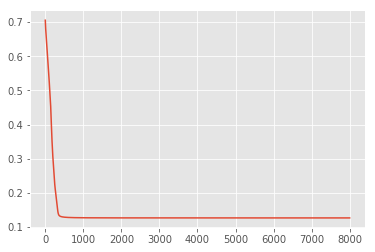

In [15]:
plt.plot(loss_list)

In [16]:
xx, yy = make_meshgrid(x[:, 0], x[:, 1])

In [17]:
# for predict
new_x = np.c_[xx.ravel(), yy.ravel()]
new_feature = gen_feature(new_x)

In [18]:
y_pred = sess.run(out, feed_dict={X: new_feature})

(-5.4363541603088379, 5.4636458396909298)

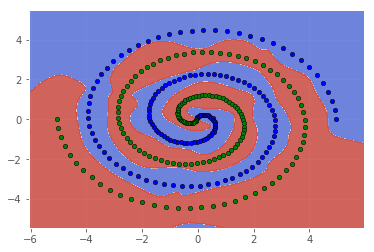

In [19]:
pred_y = np.argmax(y_pred, axis=1)

ax = plt.axes()

plot_contours(ax, pred_y, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(class_0[:, 0], class_0[:, 1], c='b', s=20, edgecolors='k')
ax.scatter(class_1[:, 0], class_1[:, 1], c='g', s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())